# Análisis y preprocesamiento de los datos


El set de datos en el histórico del precio de Bitcoin en los últimos 6 años en intervalos de 4 horas. Específicamente, el histórico de precios va desde `2017-09-01 00:00:00` hasta `2024-03-01 16:00:00`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./data/BTCUSDT_data.csv')
df

c:\Users\cmglezpdev2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-09-01 00:00:00,4689.89,4767.00,4689.89,4714.73,75.647978,1504238399999,3.577917e+05,623,23.541048,1.117652e+05,0
1,2017-09-01 04:00:00,4714.73,4734.99,4654.88,4707.50,101.226134,1504252799999,4.752488e+05,541,11.099094,5.221275e+04,0
2,2017-09-01 08:00:00,4715.00,4798.46,4708.09,4775.00,130.966655,1504267199999,6.215984e+05,810,27.874135,1.324149e+05,0
3,2017-09-01 12:00:00,4775.00,4839.92,4725.81,4803.83,68.887712,1504281599999,3.283915e+05,518,16.259311,7.782224e+04,0
4,2017-09-01 16:00:00,4756.46,4815.67,4738.94,4813.24,96.951623,1504295999999,4.632636e+05,893,14.847570,7.112327e+04,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14222,2024-03-01 00:00:00,61130.99,61749.00,60777.00,61105.91,6345.576410,1709265599999,3.883900e+08,243343,3207.822120,1.963594e+08,0
14223,2024-03-01 04:00:00,61105.92,61772.82,61061.11,61434.00,5719.405040,1709279999999,3.515761e+08,265072,2862.632240,1.759705e+08,0
14224,2024-03-01 08:00:00,61434.00,62243.53,61316.67,61863.72,8452.279910,1709294399999,5.238901e+08,322392,4193.921850,2.599266e+08,0
14225,2024-03-01 12:00:00,61863.71,62677.06,61131.01,61263.99,9971.279050,1709308799999,6.188431e+08,479317,4952.556980,3.074801e+08,0


El tiempo es un objecto, así que lo convertiremos a datetime


In [2]:
df['Open time'].dtype

df['Open time'] = pd.to_datetime(
  df['Open time'],
  format='ISO8601'
)

df = df.set_index('Open time')
df.sort_index(inplace=True)

# Drop columns that are no interesting
df = df.drop(columns=['Close time', 'Quote asset volume', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df

,Open,High,Low,Close,Volume,Number of trades
Open time,,,,,,
2017-09-01 00:00:00,4689.89,4767.00,4689.89,4714.73,75.647978,623
2017-09-01 04:00:00,4714.73,4734.99,4654.88,4707.50,101.226134,541
2017-09-01 08:00:00,4715.00,4798.46,4708.09,4775.00,130.966655,810
2017-09-01 12:00:00,4775.00,4839.92,4725.81,4803.83,68.887712,518
2017-09-01 16:00:00,4756.46,4815.67,4738.94,4813.24,96.951623,893
...,...,...,...,...,...,...
2024-03-01 00:00:00,61130.99,61749.00,60777.00,61105.91,6345.576410,243343
2024-03-01 04:00:00,61105.92,61772.82,61061.11,61434.00,5719.405040,265072
2024-03-01 08:00:00,61434.00,62243.53,61316.67,61863.72,8452.279910,322392


## Analisis Exploratorio

Las variables del conjunto de datos son las siguentes:

- `Open time`: dia + hora de apertura de la vela
- `Open`: precio de apertura de la vela
- `High`: precio máximo alcanzado por la vela
- `Low` : precio mínimo alacanzado por la vela
- `Close`: precio de cierre de la vela
- `Volume`: volumen de compra/venta en esta vela
- `Number of trades`: cantidad de operaciones compra/venta en esta vela

Las demas variables no son interesantes para nuestro caso de predecir el precio

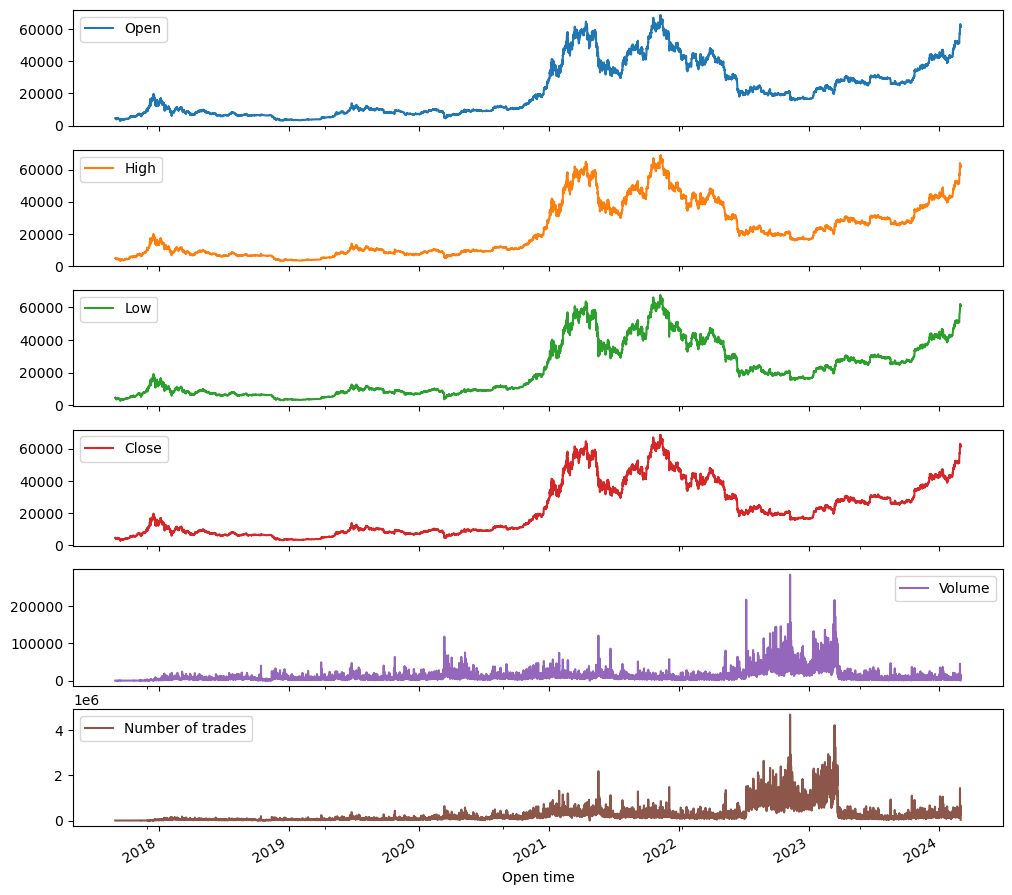

In [5]:
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(12, 12))

Verificar si hay datos faltantes

In [6]:
print('Cantidad de NaN:')
for column in cols:
  nans = df[column].isna().sum()
  print(f'\tColumna: {column}: {nans}')

Cantidad de NaN:
	Columna: Open: 0
	Columna: High: 0
	Columna: Low: 0
	Columna: Close: 0
	Columna: Volume: 0
	Columna: Number of trades: 0


In [8]:
# Verificar si la periodicidad de las muestras es exactamente
# 4 horas (14400 secs)

# Calcular diferencias (en segundos) entre cada par de datos
# consecutivos
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

Open time
14400.0     14218
28800.0         5
43200.0         2
115200.0        1
Name: count, dtype: int64


Aqui se ve que:
- 5 datos tienen diferencia de 28800 segundos (8 horas)
- 2 datos tienen diferencia de 43200 segundos (12 horas)
- 1 datos tiene diferencia de 115200 segundos (32 horas)

Para arreglar el problema de la periodicidad usaremos en método asfreq de Pandas. Como apareceran nuevos datos, usaremos el método `bfill` para rellenar estos nuevos datos: 

In [15]:
df2 = df.asfreq(freq='4h', method='bfill')

df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

Open time
14400.0    14242
Name: count, dtype: int64


In [16]:
# Verificar que el dataset resultante no contiene NaNs:
print('Cantidad de NaNs:')
for column in df:
    nans = df2[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna Open: 0
	Columna High: 0
	Columna Low: 0
	Columna Close: 0
	Columna Volume: 0
	Columna Number of trades: 0


In [23]:
# Y finalmente verificar las columnas originales y modificadas
# para constatar que los valores promedio no cambian
print('Promedios original/modificado')

for column in df:
    print(f'\t{column}: {df[column].mean():.2f}/{df2[column].mean():.2f}')

print('\nDiferencia de promedios')
for column in df:
    print(f'\t{column}: {(df2[column].mean() - df[column].mean()):.2f}')

Promedios original/modificado
	Open: 21657.00/21641.09
	High: 21879.46/21863.64
	Low: 21419.20/21403.51
	Close: 21661.04/21645.37
	Volume: 12172.35/12164.46
	Number of trades: 242261.07/242034.71

Diferencia de promedios
	Open: -15.91
	High: -15.82
	Low: -15.69
	Close: -15.67
	Volume: -7.89
	Number of trades: -226.36


In [24]:
df2.to_csv('./data/BTCUSDT_data_fixed.csv')